# KNN no `chb04_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando o array com a ordem do melhor desempenho

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb04_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.803571,0.892857,0.955357,0.955357,0.866071,0.910714,0.892857,0.946429,0.758929,0.848214,0.946429,0.937500,0.794643,0.883929,0.883929,0.910714,0.883929,0.883929
1,0.830357,0.821429,0.937500,0.928571,0.875000,0.875000,0.919643,0.955357,0.803571,0.839286,0.928571,0.964286,0.767857,0.883929,0.857143,0.937500,0.857143,0.892857
2,0.875000,0.830357,0.982143,0.973214,0.857143,0.910714,0.883929,0.964286,0.794643,0.883929,0.964286,0.964286,0.830357,0.937500,0.883929,0.955357,0.883929,0.875000
3,0.794643,0.848214,0.919643,0.946429,0.883929,0.919643,0.866071,0.919643,0.803571,0.892857,0.928571,0.937500,0.821429,0.875000,0.955357,0.910714,0.901786,0.892857
4,0.857143,0.821429,0.955357,0.910714,0.839286,0.928571,0.892857,0.955357,0.812500,0.812500,0.955357,0.973214,0.821429,0.848214,0.883929,0.892857,0.892857,0.883929
5,0.821429,0.830357,0.937500,0.955357,0.866071,0.892857,0.875000,0.901786,0.785714,0.830357,0.901786,0.937500,0.741071,0.901786,0.892857,0.946429,0.848214,0.857143
6,0.839286,0.875000,0.955357,0.955357,0.892857,0.901786,0.866071,0.964286,0.830357,0.919643,0.973214,0.955357,0.910714,0.892857,0.928571,0.910714,0.866071,0.866071
7,0.866071,0.812500,0.955357,0.955357,0.901786,0.937500,0.883929,0.955357,0.830357,0.812500,0.946429,0.946429,0.776786,0.839286,0.910714,0.928571,0.919643,0.875000
8,0.830357,0.875000,0.937500,0.937500,0.866071,0.937500,0.919643,0.973214,0.901786,0.910714,0.955357,0.955357,0.839286,0.919643,0.892857,0.937500,0.857143,0.928571
9,0.794643,0.776786,0.901786,0.946429,0.883929,0.901786,0.866071,0.919643,0.883929,0.928571,0.928571,0.955357,0.776786,0.875000,0.901786,0.928571,0.901786,0.892857


,count,mean,std,min,25%,50%,75%,max
11,20.0,0.955357,0.015866,0.928571,0.937500,0.955357,0.964286,0.991071
10,20.0,0.948661,0.019833,0.901786,0.935268,0.955357,0.957589,0.982143
2,20.0,0.946875,0.018430,0.901786,0.937500,0.946429,0.955357,0.982143
3,20.0,0.945982,0.016252,0.910714,0.937500,0.950893,0.955357,0.973214
7,20.0,0.940625,0.023936,0.901786,0.919643,0.950893,0.957589,0.973214
15,20.0,0.926786,0.017998,0.892857,0.910714,0.928571,0.937500,0.955357
5,20.0,0.907143,0.022326,0.857143,0.899554,0.910714,0.919643,0.937500
14,20.0,0.895982,0.032937,0.803571,0.883929,0.892857,0.912946,0.955357
17,20.0,0.890179,0.023905,0.848214,0.875000,0.888393,0.901786,0.955357
16,20.0,0.890179,0.023193,0.848214,0.879464,0.892857,0.904018,0.928571


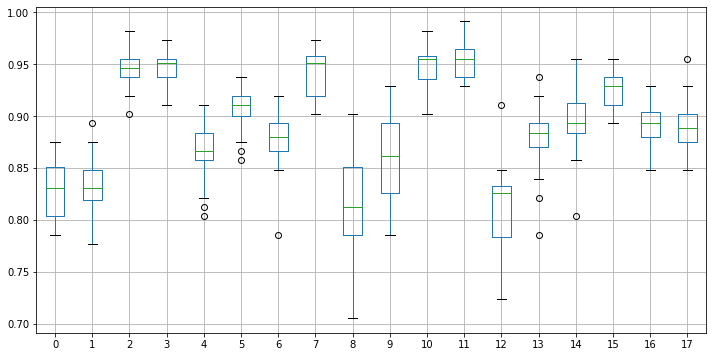

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
describe_DF = accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)
describe_DF

## Salvando rank em arquivo npy

In [4]:
np.save('./chb04_rank.npy', describe_DF.index)